In [31]:
import pandas as pd
import spacy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.corpus import stopwords
nltk.download("stopwords")



pd.set_option('display.max_columns', None)  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kadss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kadss\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
train = pd.read_csv('data/dev-set.txt', sep="\t",error_bad_lines=False)


b'Skipping line 564: expected 4 fields, saw 5\nSkipping line 641: expected 4 fields, saw 5\nSkipping line 777: expected 4 fields, saw 5\nSkipping line 872: expected 4 fields, saw 6\nSkipping line 968: expected 4 fields, saw 5\n'


In [33]:
train.head()


,id,Sentence1,Sentence2,Gold Tag
0,s_1,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,5.0
1,s_2,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.0
2,s_3,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.0
3,s_4,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,5.0
4,s_5,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.0


In [34]:
train.shape

(1160, 4)

In [144]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [145]:
#tokenization

train['tokenized_sent1'] = train.apply(lambda row: nltk.word_tokenize(row['Sentence1']), axis=1)
train['tokenized_sent2'] = train.apply(lambda row: nltk.word_tokenize(row['Sentence2']), axis=1)

In [146]:
train.head()



,id,Sentence1,Sentence2,Gold Tag,tokenized_sent1,tokenized_sent2
0,s_1,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,5.0,"[The, leaders, have, now, been, given, a, new,...","[The, leaders, benefit, aujourd, ', hui, of, a..."
1,s_2,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.0,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, is, proposing, certain, cha..."
2,s_3,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.0,"[Let, me, remind, you, that, our, allies, incl...","[I, would, like, to, remind, you, that, among,..."
3,s_4,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,5.0,"[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]"
4,s_5,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.0,"[The, fishermen, are, inactive, ,, tired, and,...","[The, fishermen, are, inactive, ,, tired, and,..."


In [147]:
#lemmatization

def lemmatize(s):
       
    s = [lemmatizer.lemmatize(word) for word in s]
    return s
    

train['lemmatized_sent1'] = train.apply(lambda row: lemmatize(row['tokenized_sent1']), axis=1)
train['lemmatized_sent2'] = train.apply(lambda row: lemmatize(row['tokenized_sent2']), axis=1)


#stop words
stop = stopwords.words('english')
train['lemmatized_sent1'].apply(lambda x: [item for item in x if item not in stop])
train['lemmatized_sent2'].apply(lambda x: [item for item in x if item not in stop])



0       [The, leader, benefit, aujourd, ', hui, new, l...
1       [Amendment, No, 7, proposing, certain, change,...
2       [I, would, like, remind, among, ally, ,, stron...
3                        [The, vote, take, place, 5.30pm]
4       [The, fisherman, inactive, ,, tired, disappoin...
5       [There, wa, majority, voting, Parliament, go, ...
6       [It, ha, effect, augmenting, potency, big, cou...
7       [The, fisher, inactive, ,, tired, disappointed...
8       [Leaders, another, chance, let, therefore, tak...
9                      [The, vote, take, place, 17h30, .]
10                          [The, body, must, balance, .]
11      [We, proud, often, represent, citizen, Europe, .]
12      [(, The, Parliament, adopts, legislative, reso...
13      [The, leader, benefit, aujourd, ', hui, ', new...
14      [I, belong, Members, present, rather, honourab...
15                                              [Tunisia]
16      [It, qualified, majority, Parliament, return, ...
17      [As, I

In [188]:
train.head()

,id,Sentence1,Sentence2,Gold Tag,tokenized_sent1,tokenized_sent2,lemmatized_sent1,lemmatized_sent2,POS_Tags1,POS_Tags2,Dep_par1,Dep_par2
0,s_1,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,5.0,"[The, leaders, have, now, been, given, a, new,...","[The, leaders, benefit, aujourd, ', hui, of, a...","[The, leader, have, now, been, given, a, new, ...","[The, leader, benefit, aujourd, ', hui, of, a,...","[(The, DT), (leader, NN), (have, VBP), (now, R...","[(The, DT), (leader, NN), (benefit, NN), (aujo...","[[The, DT, det, leaders, NNS, 1, 2], [leaders,...","[[The, DT, det, leaders, NNS, 1, 2], [leaders,..."
1,s_2,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.0,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, is, proposing, certain, cha...","[Amendment, No, 7, proposes, certain, change, ...","[Amendment, No, 7, is, proposing, certain, cha...","[(Amendment, NNP), (No, NNP), (7, CD), (propos...","[(Amendment, NNP), (No, NNP), (7, CD), (is, VB...","[[Amendment, JJ, nsubj, proposes, VBZ, 1, 4], ...","[[Amendment, NN, nsubj, proposing, VBG, 1, 5],..."
2,s_3,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.0,"[Let, me, remind, you, that, our, allies, incl...","[I, would, like, to, remind, you, that, among,...","[Let, me, remind, you, that, our, ally, includ...","[I, would, like, to, remind, you, that, among,...","[(Let, VB), (me, PRP), (remind, VB), (you, PRP...","[(I, PRP), (would, MD), (like, VB), (to, TO), ...","[[Let, VB, ROOT, Let, VB, 1, 1], [me, PRP, nsu...","[[I, PRP, nsubj, like, VB, 1, 3], [would, MD, ..."
3,s_4,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,5.0,"[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]","[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]","[(The, DT), (vote, NN), (will, MD), (take, VB)...","[(The, DT), (vote, NN), (will, MD), (take, VB)...","[[The, DT, det, vote, NN, 1, 2], [vote, NN, ns...","[[The, DT, det, vote, NN, 1, 2], [vote, NN, ns..."
4,s_5,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.0,"[The, fishermen, are, inactive, ,, tired, and,...","[The, fishermen, are, inactive, ,, tired, and,...","[The, fisherman, are, inactive, ,, tired, and,...","[The, fisherman, are, inactive, ,, tired, and,...","[(The, DT), (fisherman, NN), (are, VBP), (inac...","[(The, DT), (fisherman, NN), (are, VBP), (inac...","[[The, DT, det, fishermen, NNS, 1, 2], [fisher...","[[The, DT, det, fishermen, NNS, 1, 2], [fisher..."


In [149]:
train['POS_Tags1'] = train.apply(lambda row: nltk.pos_tag(row['lemmatized_sent1']), axis=1)
train['POS_Tags2'] = train.apply(lambda row: nltk.pos_tag(row['lemmatized_sent2']), axis=1)

In [348]:
train['Root1'] = train.apply(lambda row: dependency_parse(row['Sentence1']), axis=1)
train['Root2'] = train.apply(lambda row: dependency_parse(row['Sentence2']), axis=1)

In [350]:
train['flagCheckRoot'] = train.apply(lambda row: row['Root1']==row['Root2'], axis=1)

In [351]:
train.head()

,id,Sentence1,Sentence2,Gold Tag,tokenized_sent1,tokenized_sent2,lemmatized_sent1,lemmatized_sent2,POS_Tags1,POS_Tags2,Dep_par1,Dep_par2,Root1,Root2,flagCheckRoot
0,s_1,The leaders have now been given a new chance and let us hope they seize it.,The leaders benefit aujourd' hui of a new luck and let's let them therefore seize it.,5.0,"[The, leaders, have, now, been, given, a, new, chance, and, let, us, hope, they, seize, it, .]","[The, leaders, benefit, aujourd, ', hui, of, a, new, luck, and, let, 's, let, them, therefore, seize, it, .]","[The, leader, have, now, been, given, a, new, chance, and, let, u, hope, they, seize, it, .]","[The, leader, benefit, aujourd, ', hui, of, a, new, luck, and, let, 's, let, them, therefore, seize, it, .]","[(The, DT), (leader, NN), (have, VBP), (now, RB), (been, VBN), (given, VBN), (a, DT), (new, JJ), (chance, NN), (and, CC), (let, VB), (u, JJ), (hope, NN), (they, PRP), (seize, VBP), (it, PRP), (., .)]","[(The, DT), (leader, NN), (benefit, NN), (aujourd, NN), (', POS), (hui, NN), (of, IN), (a, DT), (new, JJ), (luck, NN), (and, CC), (let, VB), ('s, POS), (let, VB), (them, PRP), (therefore, RB), (seize, VBD), (it, PRP), (., .)]","[[The, DT, det, leaders, NNS, 1, 2], [leaders, NNS, nsubjpass, given, VBN, 2, 6], [have, VBP, aux, given, VBN, 3, 6], [now, RB, advmod, given, VBN, 4, 6], [been, VBN, auxpass, given, VBN, 5, 6], [given, VBN, ROOT, given, VBN, 6, 6], [a, DT, det, chance, NN, 7, 9], [new, JJ, amod, chance, NN, 8, 9], [chance, NN, dobj, given, VBN, 9, 6], [and, CC, cc, given, VBN, 10, 6], [let, VB, conj, given, VBN, 11, 6], [us, PRP, nsubj, hope, VB, 12, 13], [hope, VB, ccomp, let, VB, 13, 11], [they, PRP, nsubj, seize, VBP, 14, 15], [seize, VBP, ccomp, hope, VB, 15, 13], [it, PRP, dobj, seize, VBP, 16, 15], [., ., punct, given, VBN, 17, 6]]","[[The, DT, det, leaders, NNS, 1, 2], [leaders, NNS, nsubj, benefit, VBP, 2, 3], [benefit, VBP, ROOT, benefit, VBP, 3, 3], [aujourd, JJ, poss, hui, NN, 4, 6], [', '', case, aujourd, JJ, 5, 4], [hui, NN, dobj, benefit, VBP, 6, 3], [of, IN, prep, hui, NN, 7, 6], [a, DT, det, luck, NN, 8, 10], [new, JJ, amod, luck, NN, 9, 10], [luck, NN, pobj, of, IN, 10, 7], [and, CC, cc, benefit, VBP, 11, 3], [let, VB, conj, benefit, VBP, 12, 3], ['s, PRP, nsubj, let, VB, 13, 14], [let, VB, ccomp, let, VB, 14, 12], [them, PRP, nsubj, seize, VB, 15, 17], [therefore, RB, advmod, seize, VB, 16, 17], [seize, VB, ccomp, let, VB, 17, 14], [it, PRP, dobj, seize, VB, 18, 17], [., ., punct, benefit, VBP, 19, 3]]",given,benefit,False
1,s_2,Amendment No 7 proposes certain changes in the references to paragraphs.,Amendment No 7 is proposing certain changes in the references to paragraphs.,5.0,"[Amendment, No, 7, proposes, certain, changes, in, the, references, to, paragraphs, .]","[Amendment, No, 7, is, proposing, certain, changes, in, the, references, to, paragraphs, .]","[Amendment, No, 7, proposes, certain, change, in, the, reference, to, paragraph, .]","[Amendment, No, 7, is, proposing, certain, change, in, the, reference, to, paragraph, .]","[(Amendment, NNP), (No, NNP), (7, CD), (proposes, VBZ), (certain, JJ), (change, NN), (in, IN), (the, DT), (reference, NN), (to, TO), (paragraph, VB), (., .)]","[(Amendment, NNP), (No, NNP), (7, CD), (is, VBZ), (proposing, VBG), (certain, JJ), (change, NN), (in, IN), (the, DT), (reference, NN), (to, TO), (paragraph, VB), (., .)]","[[Amendment, JJ, nsubj, proposes, VBZ, 1, 4], [No, NN, det, 7, CD, 2, 3], [7, CD, nummod, Amendment, JJ, 3, 1], [proposes, VBZ, ROOT, proposes, VBZ, 4, 4], [certain, JJ, amod, changes, NNS, 5, 6], [changes, NNS, dobj, proposes, VBZ, 6, 4], [in, IN, prep, changes, NNS, 7, 6], [the, DT, det, references, NNS, 8, 9], [references, NNS, pobj, in, IN, 9, 7], [to, IN, prep, references, NNS, 10, 9], [paragraphs, NNS, pobj, to, IN, 11, 10], [., ., punct, proposes, VBZ, 12, 4]]","[[Amendment, NN, nsubj, proposing, VBG, 1, 5], [No, NNP, det, 7, CD, 2, 3], [7, CD, nummod, Amendment, NN, 3, 1], [is, VBZ, aux, proposing, VBG, 4,

In [150]:
train1=train[['id', 'Sentence1', 'Sentence2', 'Gold Tag', 'lemmatized_sent1', 'lemmatized_sent2', 'POS_Tags1',
       'POS_Tags2']]

In [328]:
pd.set_option('display.max_colwidth', -1)
train['Dep_par1']

0       [[The, DT, det, leaders, NNS, 1, 2], [leaders, NNS, nsubjpass, given, VBN, 2, 6], [have, VBP, aux, given, VBN, 3, 6], [now, RB, advmod, given, VBN, 4, 6], [been, VBN, auxpass, given, VBN, 5, 6], [given, VBN, ROOT, given, VBN, 6, 6], [a, DT, det, chance, NN, 7, 9], [new, JJ, amod, chance, NN, 8, 9], [chance, NN, dobj, given, VBN, 9, 6], [and, CC, cc, given, VBN, 10, 6], [let, VB, conj, given, VBN, 11, 6], [us, PRP, nsubj, hope, VB, 12, 13], [hope, VB, ccomp, let, VB, 13, 11], [they, PRP, nsubj, seize, VBP, 14, 15], [seize, VBP, ccomp, hope, VB, 15, 13], [it, PRP, dobj, seize, VBP, 16, 15], [., ., punct, given, VBN, 17, 6]]                                                                                                                                                                                                                                                                                                                                                                           

In [152]:
# =========== util func ==============
def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'): return 'n'
    if tag.startswith('V'): return 'v'
    if tag.startswith('J'): return 'a'
    if tag.startswith('R'): return 'r'
    return None
 
def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

notin_cnt = [0]
# =========== feature extraction ==============
def sentence_similarity_word_alignment(sentence1, sentence2):
    """ compute the sentence similarity using Wordnet and ppdb """
    # Tokenize and tag
    sentence1 = pos_tag(word_tokenize(sentence1))
    sentence2 = pos_tag(word_tokenize(sentence2)) 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence2]
    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
    score, count = 0.0, 0
    ppdb_score, align_cnt = 0, 0
    # For each word in the first sentence
    for synset in synsets1:
        # Get the similarity value of the most similar word in the other sentence
        L = [synset.path_similarity(ss) for ss in synsets2]
        L_prime = L
        L = [l for l in L if l]

        # compute ppdb score
        # if len(L) > 0 and max(L) > 0.6:
        #     align_cnt += 1
        #     ss2 = synsets2[L_prime.index(max(L))]
        #     w1, w2 = synset.lemma_names()[0], ss2.lemma_names()[0]
        #     if (w1, w2) in ppdb:
        #         ppdb_score += ppdb[(w1, w2)]
        #     elif (w2, w1) in ppdb:
        #         ppdb_score += ppdb[(w2, w1)]
        #     else:
        #         if w2 == w1:
        #             ppdb_score += 5
        #         else:
        #             ppdb_score += 0
        #         notin_cnt[0] += 1


        # Check that the similarity could have been computed

        if L: 
            best_score = max(L)
            score += best_score
            count += 1
    # Average the values
    if count >0: score /= count

    # ppdb_wa_pen_ua features
    # len_s1, len_s2 = len(sentence1), len(sentence2)
    # ppdb_score = (1 - 0.4 * (len_s1 + len_s2 - 2*align_cnt) / float(len_s1 + len_s2)) * ppdb_score
    return score#, ppdb_score

In [44]:
sentence1="Amendment No 7 proposes certain changes in the references to paragraphs."
sentence2="Amendment No 7 is proposing certain changes in the references to paragraphs"

sentence1 = nltk.pos_tag(nltk.word_tokenize(sentence1))
sentence2 = nltk.pos_tag(nltk.word_tokenize(sentence2))

In [45]:
sentence1

[('Amendment', 'NNP'),
 ('No', 'NNP'),
 ('7', 'CD'),
 ('proposes', 'VBZ'),
 ('certain', 'JJ'),
 ('changes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('references', 'NNS'),
 ('to', 'TO'),
 ('paragraphs', 'VB'),
 ('.', '.')]

In [46]:
def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'): return 'n'
    if tag.startswith('V'): return 'v'
    if tag.startswith('J'): return 'a'
    if tag.startswith('R'): return 'r'
    return None
 
def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None


In [47]:
def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
  
    if wn_tag is None:
        return None
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

In [48]:
for word in sentence1:
    print(tagged_to_synset(*word))
    

Synset('amendment.n.01')
Synset('no.n.01')
None
Synset('propose.v.01')
Synset('certain.s.01')
Synset('change.n.01')
None
None
Synset('mention.n.01')
None
Synset('paragraph.v.01')
None


In [49]:
sentence1


[('Amendment', 'NNP'),
 ('No', 'NNP'),
 ('7', 'CD'),
 ('proposes', 'VBZ'),
 ('certain', 'JJ'),
 ('changes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('references', 'NNS'),
 ('to', 'TO'),
 ('paragraphs', 'VB'),
 ('.', '.')]

In [50]:
if 'NNP'.startswith('N'):
    print(1)

1


In [21]:
x=[wn.synsets('dog', 'n')[0],wn.synsets('chews', 'v')[0],wn.synsets('bone', 'n')[0]]
y=[wn.synsets('dog', 'n')[0],wn.synsets('drinks', 'v')[0],wn.synsets('milk', 'n')[0]]

In [22]:
x

[Synset('dog.n.01'), Synset('chew.v.01'), Synset('bone.n.01')]

In [23]:

    # Get the similarity value of the most similar word in the other sentence
L = [synset.path_similarity(ss) for synset in x for ss in y]

In [24]:
L

[1.0,
 None,
 0.07692307692307693,
 0.0625,
 0.1111111111111111,
 0.06666666666666667,
 0.06666666666666667,
 None,
 0.07692307692307693]

In [346]:
def dependency_parse(sentence):
    #result=[]
    doc=nlp(sentence)
    for token in doc:    
        if(token.dep_=="ROOT"):
            return lemmatizer.lemmatize(token.text)
        #result.append([token.text,token.tag_, token.dep_, token.head.text, token.head.tag_, token.i+1, token.head.i+1])
    #return result

In [ ]:
def headWordCheck()

In [347]:
dependency_parse('The bird is bathing.')

'bathing'

In [153]:
train['Dep_par1'] = train.apply(lambda row: dependency_parse(row['Sentence1']), axis=1)
train['Dep_par2'] = train.apply(lambda row: dependency_parse(row['Sentence2']), axis=1)

In [53]:
train.to_csv('sample.txt')


In [54]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bird'):
    print(ss, ss.hypernyms())
 
    

Synset('bird.n.01') [Synset('vertebrate.n.01')]
Synset('bird.n.02') [Synset('meat.n.01')]
Synset('dame.n.01') [Synset('girl.n.01')]
Synset('boo.n.01') [Synset('cry.n.01')]
Synset('shuttlecock.n.01') [Synset('badminton_equipment.n.01')]
Synset('bird.v.01') [Synset('observe.v.04')]


In [29]:
wn.synsets('vertebrate')

[Synset('vertebrate.n.01'), Synset('vertebrate.a.01')]

In [30]:
from nltk.corpus import wordnet as wn
wn.synsets('bird').meronyms()

AttributeError: 'list' object has no attribute 'meronyms'

In [ ]:
train.head()

In [ ]:
## modeling

In [55]:
from collections import defaultdict
import pprint
import argparse
import difflib
from googletrans import Translator
import numpy as np
import pickle
translator = Translator()
import time
from nltk.corpus import wordnet_ic
from gensim.models import KeyedVectors
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet_ic to
[nltk_data]     C:\Users\kadss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


True

In [315]:
from nltk.corpus import wordnet as wn
brown_ic = wordnet_ic.ic('ic-brown.dat')
vec1 = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
vec2 = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

pp = pprint.PrettyPrinter()

import torch
#lstm



ModuleNotFoundError: No module named 'torch'

In [154]:
def sentence_similarity_simple_baseline(s1, s2,counts = None):
    def embedding_count(s):
        ret_embedding = defaultdict(int)
        for w in s.split():
            w = w.strip('?.,')
            ret_embedding[w] += 1
        return ret_embedding
    first_sent_embedding = embedding_count(s1)
    second_sent_embedding = embedding_count(s2)
    Embedding1 = []
    Embedding2 = []
    if counts:
        for w in first_sent_embedding:
            Embedding1.append(first_sent_embedding[w] * 1.0/ (counts[w]+0.001))
            Embedding2.append(second_sent_embedding[w] *1.0/ (counts[w]+0.001))
    else:
        for w in first_sent_embedding:
            Embedding1.append(first_sent_embedding[w])
            Embedding2.append(second_sent_embedding[w])
    ret_score = 0
    if not 0 == sum(Embedding2): 
        #https://stackoverflow.com/questions/6709693/calculating-the-similarity-of-two-lists
        # https://docs.python.org/3/library/difflib.html
        sm= difflib.SequenceMatcher(None,Embedding1,Embedding2)
        ret_score = sm.ratio()*5 
    return ret_score

In [155]:
def sentence_similarity_simple_baseline(s1, s2,counts = None):
    def embedding_count(s):
        ret_embedding = defaultdict(int)
        for w in s.split():
            w = w.strip('?.,')
            ret_embedding[w] += 1
        return ret_embedding
    first_sent_embedding = embedding_count(s1)
    second_sent_embedding = embedding_count(s2)
    Embedding1 = []
    Embedding2 = []
    if counts:
        for w in first_sent_embedding:
            Embedding1.append(first_sent_embedding[w] * 1.0/ (counts[w]+0.001))
            Embedding2.append(second_sent_embedding[w] *1.0/ (counts[w]+0.001))
    else:
        for w in first_sent_embedding:
            Embedding1.append(first_sent_embedding[w])
            Embedding2.append(second_sent_embedding[w])
    ret_score = 0
    if not 0 == sum(Embedding2): 
        #https://stackoverflow.com/questions/6709693/calculating-the-similarity-of-two-lists
        # https://docs.python.org/3/library/difflib.html
        sm= difflib.SequenceMatcher(None,Embedding1,Embedding2)
        ret_score = sm.ratio()*5 
    return ret_score

#--------------------
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn

# =========== util func ==============
def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'): return 'n'
    if tag.startswith('V'): return 'v'
    if tag.startswith('J'): return 'a'
    if tag.startswith('R'): return 'r'
    return None
 
def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

notin_cnt = [0]
# =========== feature extraction ==============
def sentence_similarity_word_alignment(sentence1, sentence2):
    """ compute the sentence similarity using Wordnet and ppdb """
    # Tokenize and tag
    sentence1 = pos_tag(word_tokenize(sentence1))
    sentence2 = pos_tag(word_tokenize(sentence2)) 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence2]
    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
    score, count = 0.0, 0
    ppdb_score, align_cnt = 0, 0
    # For each word in the first sentence
    for synset in synsets1:
        # Get the similarity value of the most similar word in the other sentence
        L = [synset.path_similarity(ss) for ss in synsets2]
        L_prime = L
        L = [l for l in L if l]

      

        if L: 
            best_score = max(L)
            score += best_score
            count += 1
    # Average the values
    if count >0: score /= count

    # ppdb_wa_pen_ua features
    # len_s1, len_s2 = len(sentence1), len(sentence2)
    # ppdb_score = (1 - 0.4 * (len_s1 + len_s2 - 2*align_cnt) / float(len_s1 + len_s2)) * ppdb_score
    return score#, ppdb_score
# =================================
def extract_overlap_pen(s1, s2):
    """
    :param s1:
    :param s2:
    :return: overlap_pen score
    """
    ss1 = s1.strip().split()
    ss2 = s2.strip().split()
    ovlp_cnt = 0
    for w1 in ss1:
        ovlp_cnt += ss2.count(w1)
    score = 2 * ovlp_cnt / (len(ss1) + len(ss2) + .0)
    return score

def extract_absolute_difference(s1, s2):
    """t \in {all tokens, adjectives, adverbs, nouns, and verbs}"""
    s1, s2 = word_tokenize(s1), word_tokenize(s2)
    pos1, pos2 = pos_tag(s1), pos_tag(s2)
    # all tokens
    t1 = abs(len(s1) - len(s2)) / float(len(s1) + len(s2))
    # all adjectives
    cnt1 = len([1 for item in pos1 if item[1].startswith('J')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('J')])
    if cnt1 == 0 and cnt2 == 0:
        t2 = 0
    else:
        t2 = abs(cnt1 - cnt2) / float(cnt1 + cnt2)
    # all adverbs
    cnt1 = len([1 for item in pos1 if item[1].startswith('R')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('R')])
    if cnt1 == 0 and cnt2 == 0:
        t3 = 0
    else:
        t3 = abs(cnt1 - cnt2) / float(cnt1 + cnt2)
    # all nouns
    cnt1 = len([1 for item in pos1 if item[1].startswith('N')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('N')])
    if cnt1 == 0 and cnt2 == 0:
        t4 = 0
    else:
        t4 = abs(cnt1 - cnt2) / float(cnt1 + cnt2)
    # all verbs
    cnt1 = len([1 for item in pos1 if item[1].startswith('V')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('V')])
    if cnt1 == 0 and cnt2 == 0:
        t5 = 0
    else:
        t5 = abs(cnt1 - cnt2) / float(cnt1 + cnt2)
    return [t1, t2, t3, t4, t5]

def extract_mmr_t(s1, s2):
    shorter = 1
    if(len(s1) > len(s2)):  shorter = 2

    s1, s2 = word_tokenize(s1), word_tokenize(s2)
    pos1, pos2 = pos_tag(s1), pos_tag(s2)
    # all tokens
    t1 = (len(s1)+0.001) / (len(s2) +0.001)
    # all adjectives
    cnt1 = len([1 for item in pos1 if item[1].startswith('J')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('J')])
    if cnt1 == 0 and cnt2 == 0:
        t2 = 0
    else:
        t2 = (cnt1 +0.001) / (cnt2 + 0.001)
    # all adverbs
    cnt1 = len([1 for item in pos1 if item[1].startswith('R')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('R')])
    if cnt1 == 0 and cnt2 == 0:
        t3 = 0
    else:
        t3 = (cnt1 +0.001) / (cnt2+0.001)
    # all nouns
    cnt1 = len([1 for item in pos1 if item[1].startswith('N')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('N')])
    if cnt1 == 0 and cnt2 == 0:
        t4 = 0
    else:
        t4 = (cnt1 +0.001) / (cnt2 +0.001)
    # all verbs
    cnt1 = len([1 for item in pos1 if item[1].startswith('V')])
    cnt2 = len([1 for item in pos2 if item[1].startswith('V')])
    if cnt1 == 0 and cnt2 == 0:
        t5 = 0
    else:
        t5 = (cnt1+ 0.001) / (cnt2 + 0.001)

    if shorter == 2:
        t1 = 1 / (t1 + 0.001)
        t2 = 1 / (t2 + 0.001)
        t3 = 1 / (t3 + 0.001)
        t4 = 1 / (t4 + 0.001)
        t5 = 1 / (t5 + 0.001)

    return [t1, t2, t3, t4, t5]    

def sentence_similarity_information_content(sentence1, sentence2):

    ''' compute the sentence similairty using information content from wordnet '''
    # Tokenize and tag
    sentence1 = pos_tag(word_tokenize(sentence1))
    sentence2 = pos_tag(word_tokenize(sentence2)) 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence2]
    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
    score, count = 0.0, 0
    ppdb_score, align_cnt = 0, 0
    # For each word in the first sentence
    for synset in synsets1:
        L = []
        for ss in synsets2:
            try:
                L.append(synset.res_similarity(ss, brown_ic))
            except:
                continue
        if L: 
            best_score = max(L)
            score += best_score
            count += 1
    # Average the values
    if count >0: score /= count
    return score

def extract_res_vec_similarity(s1, s2):
    first_sents_embeddings = np.empty([0,300])
    second_sents_embeddings = np.empty([0,300])

    first_vecs = np.array([])
    for w in s1.split():
        w = w.strip('?.,')
        if w in vec1:
            first_vec = np.array([vec1[w]])
            if first_vecs.shape[0] == 0:
                first_vecs = first_vec
            else:
                first_vecs = np.vstack((first_vecs, first_vec))
        else:
            if first_vecs.shape[0] == 0:
                first_vecs = np.random.normal(0, 5, 300)
            else:
                first_vecs = np.vstack((first_vecs, np.random.normal(0, 5, 300)))
        # print("first ")
        # print(first_vecs.shape)
    if(first_vecs.shape == (300, )):
        temp = first_vecs
    else:
        temp = np.mean(first_vecs, axis=0)
    # print(temp.shape)
    first_sents_embeddings = np.append(first_sents_embeddings, [temp], axis=0)

    second_vecs = np.array([])  
    for w in s2.split():
        w = w.strip('?.,')
        if w in vec2:
            second_vec = np.array([vec2[w]])
            if second_vecs.shape[0] == 0:
                second_vecs = second_vec
            else:
                second_vecs = np.vstack((second_vecs, second_vec))
        else:
            if second_vecs.shape[0] == 0:
                second_vecs = np.random.normal(0, 5, 300)
            else:
                second_vecs = np.vstack((second_vecs, np.random.normal(0, 5, 300)))
        # print("second ")
        # print(second_vecs.shape)
    if(second_vecs.shape == (300,)):
        temp = second_vecs
    else:
        temp = np.mean(second_vecs, axis=0)
    # print(temp.shape)
    second_sents_embeddings = np.append(second_sents_embeddings, [temp], axis=0)

    for i in range(len(first_sents_embeddings)):
        # cosine similarity

        ret = np.dot(first_sents_embeddings[i], second_sents_embeddings[i]) / (np.linalg.norm(first_sents_embeddings[i]) * np.linalg.norm(second_sents_embeddings[i]))
        ret = 5*(ret + 1) / 2

    return ret



In [156]:
import gensim
import os
import collections
import smart_open
import random

def extract_doc2vec_similarity(s1,s2, model):
    s1 = [w.strip('?.,') for w in s1.split()]
    s2 = [w.strip('?.,') for w in s2.split()]
    embed1 = model.infer_vector(s1)
    embed2 = model.infer_vector(s2)
    ret = np.dot(embed1,embed2)
    return ret

In [157]:
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import LinearRegression
import sklearn

In [288]:
first_sentence=train['Sentence1']
second_sentence=train['Sentence2']
true_score=train['Gold Tag']


In [289]:
first_sents=first_sentence.tolist()
second_sents=second_sentence.tolist()
true_score=true_score.tolist()


In [290]:
print(first_sents[574])
#print(second_sents[574])

#indices_del=list(map(tuple, np.where(np.isnan(true_score))))[0]
indices_del

She was crying and scared,' said Isa Yasin, the owner of the store.	She was crying and she was really scared," said Yasin.


()

In [291]:

def remove_bad_records(true_score,first_sents,second_sents):
    
    indices_del=list(map(tuple, np.where(np.isnan(true_score))))[0]


    while len(indices_del)>0:
        print(true_score.pop(indices_del[0]))
        print(first_sents.pop(indices_del[0]))

        print(second_sents.pop(indices_del[0]))
        indices_del=list(map(tuple, np.where(np.isnan(true_score))))[0]

    

In [292]:
remove_bad_records(true_score,first_sents,second_sents)

nan
She was crying and scared,' said Isa Yasin, the owner of the store.	She was crying and she was really scared," said Yasin.
4
nan
And about eight to 10 seconds down, I hit.	I was in the water for about eight seconds.
2
nan
Right from the beginning, we didn't want to see anyone take a cut in pay.	But Mr. Crosby told The Associated Press: Right from the beginning, we didn't want to see anyone take a cut in pay.
4


In [293]:

Counts_for_tf = defaultdict(int)

for sent in first_sents:
    for w in [w.strip("?.,") for w in sent.split()]: Counts_for_tf[w] += 1
for sent in second_sents:
    for w in [w.strip("?.,") for w in sent.split()]: Counts_for_tf[w] += 1

feature_scores = []
N = len(first_sents)
T1 = time.time()
for i in range(N):
    s1 = first_sents[i]
    s2 = second_sents[i]


    scores = [ sentence_similarity_simple_baseline(s1,s2, Counts_for_tf),
               sentence_similarity_word_alignment(s1,s2)
               ,sentence_similarity_information_content(s1,s2)
               , extract_overlap_pen(s1, s2)
               ,*extract_absolute_difference(s1, s2)
               ,*extract_mmr_t(s1, s2)
               ,extract_res_vec_similarity(s1, s2),
               
             ]
    
               #, extract_doc2vec_similarity(s1,s2, model_doc2vec)]
    # cosine similarity
    feature_scores.append(scores)

In [294]:
X_features.shape

(1455, 14)

In [295]:
print(len(true_score))
print(len(first_sents))
print(len(second_sents))

1157
1157
1157


In [296]:
list(map(tuple, np.where(np.isnan(X_features))))[0]

()

In [297]:
from sklearn.svm import SVC
scaler = sklearn.preprocessing.StandardScaler()
#feature_scores.reshape(-1,-1)
scaler.fit(feature_scores)
X_features = scaler.transform(feature_scores)
#clf = SVC(gamma='scale',kernel='rbf')
clf = SVR(kernel='linear')
clf.fit(X_features, true_score)


C:\Users\kadss\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [298]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

In [299]:
import sklearn

In [300]:
from collections import defaultdict
import pprint
import argparse
import difflib
from googletrans import Translator
import numpy as np
import pickle
translator = Translator()
import time
from nltk.corpus import wordnet_ic
from gensim.models import KeyedVectors
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

In [301]:
# prediction

In [302]:
test = pd.read_csv('data/train-set.txt', sep="\t",error_bad_lines=False)

b'Skipping line 192: expected 4 fields, saw 5\nSkipping line 207: expected 4 fields, saw 5\nSkipping line 296: expected 4 fields, saw 5\nSkipping line 696: expected 4 fields, saw 5\nSkipping line 700: expected 4 fields, saw 5\n'


In [303]:
first_sents=test['Sentence1'].tolist()
second_sents=test['Sentence2'].tolist()
y_true=test['Gold Tag'].tolist()
#true_score=train['Gold Tag']

In [304]:
remove_bad_records(y_true,first_sents,second_sents)

nan
We put a lot of effort and energy into improving our patching process, probably later than we should have and now we're just gaining incredible speed.	We've put a lot of effort and energy into improving our patching progress, probably later than we should have.
4
nan
Tomorrow at the Mission Inn, I have the opportunity to congratulate the governor-elect of the great state of California.	I have the opportunity to congratulate the governor-elect of the great state of California, and I'm looking forward to it."
4


In [305]:

for sent in first_sents:
    for w in [w.strip("?.,") for w in sent.split()]: Counts_for_tf[w] += 1
for sent in second_sents:
    for w in [w.strip("?.,") for w in sent.split()]: Counts_for_tf[w] += 1


feature_scores = []
N = len(first_sents)
T1 = time.time()
for i in range(N):
    s1 = first_sents[i]
    s2 = second_sents[i]

    scores = [ sentence_similarity_simple_baseline(s1,s2, Counts_for_tf),
               sentence_similarity_word_alignment(s1,s2)
               ,sentence_similarity_information_content(s1,s2)
               ,extract_overlap_pen(s1, s2)
               ,*extract_absolute_difference(s1, s2)
               ,*extract_mmr_t(s1, s2)
               #,extract_res_vec_similarity(s1, s2)
               ]
               #, extract_doc2vec_similarity(s1,s2, model_doc2vec) ]
    # cosine similarity
    feature_scores.append(scores)
    if 0 == (i+1) % int(N/10): print("%.2f" % ((i+1) *1.0 / N *100),"%"+"finished (",time.time() - T1,")")
X_features = scaler.transform(feature_scores)
Y_pred_np = clf.predict(X_features)
Y_pred_np = [min(5,max(0,p),p) for p in Y_pred_np]

9.97 %finished ( 3.1031737327575684 )
19.93 %finished ( 6.286796808242798 )
29.90 %finished ( 9.327926874160767 )
39.86 %finished ( 12.438678979873657 )
49.83 %finished ( 15.98990511894226 )
59.79 %finished ( 20.377899169921875 )
69.76 %finished ( 24.399824857711792 )
79.73 %finished ( 28.86869502067566 )
89.69 %finished ( 33.286155462265015 )
99.66 %finished ( 37.776254653930664 )


In [306]:
Y_pred_np

[3.965015285169286,
 3.07581753561463,
 4.079156475626303,
 4.181902701972628,
 3.780846043923095,
 3.12613117218208,
 4.129424360261719,
 4.167099333717832,
 4.083951026062767,
 3.9338823462182555,
 4.431909009609889,
 4.848220367774126,
 4.574472075706764,
 4.586501089501395,
 3.9020871138756585,
 4.257042123800227,
 3.739574786165556,
 3.8930924047843414,
 3.3623367357841554,
 3.91112750633921,
 4.053366013767335,
 3.189444502900164,
 3.9385419569413727,
 2.3873468798709885,
 3.7913069200123597,
 4.362314243042453,
 3.5425153574981207,
 3.825332875467415,
 4.713408337304605,
 3.854283757748223,
 3.7325873982157267,
 2.868534653354799,
 2.7274773312592124,
 4.644808267693052,
 3.7706042795421224,
 2.832779512985666,
 3.7585843320132546,
 3.518839052473042,
 4.505665399058245,
 3.801007551032205,
 3.6847097511013667,
 3.630884959421579,
 3.87493616692713,
 3.983191605531147,
 3.993809665068102,
 3.5648881085549604,
 4.135622241621715,
 3.2207192000879163,
 4.054468504393666,
 4.351009

In [307]:
from sklearn.metrics import accuracy_score

In [309]:
#accuracy_score(y_true, Y_pred_np)
from scipy import stats
stats.pearsonr(y_true, Y_pred_np)

(0.4610190366825495, 1.8471488294691438e-77)

In [231]:
Y_pred = [ round(elem) for elem in Y_pred_np ]

In [232]:
for x, y in zip(y_true, Y_pred):
    print(x, y, sep='\t\t')

4.0		4.0
4.0		3.0
3.0		4.0
3.0		4.0
2.0		4.0
1.0		3.0
5.0		4.0
4.0		4.0
4.0		4.0
3.0		4.0
4.0		4.0
4.0		5.0
5.0		5.0
5.0		5.0
5.0		4.0
3.0		4.0
5.0		4.0
4.0		4.0
3.0		3.0
5.0		4.0
4.0		4.0
4.0		3.0
4.0		4.0
1.0		2.0
1.0		4.0
3.0		4.0
4.0		4.0
4.0		4.0
3.0		5.0
4.0		4.0
3.0		4.0
3.0		3.0
3.0		3.0
5.0		5.0
3.0		4.0
2.0		3.0
4.0		4.0
4.0		4.0
3.0		5.0
3.0		4.0
4.0		4.0
2.0		4.0
4.0		4.0
4.0		4.0
3.0		4.0
3.0		4.0
4.0		4.0
3.0		3.0
4.0		4.0
4.0		4.0
4.0		4.0
3.0		5.0
4.0		4.0
2.0		4.0
4.0		4.0
3.0		3.0
4.0		3.0
5.0		4.0
4.0		4.0
1.0		4.0
4.0		4.0
2.0		4.0
4.0		4.0
2.0		3.0
3.0		4.0
3.0		5.0
5.0		4.0
3.0		3.0
4.0		4.0
4.0		4.0
5.0		4.0
3.0		4.0
4.0		4.0
3.0		4.0
4.0		4.0
5.0		4.0
4.0		4.0
4.0		4.0
2.0		4.0
3.0		4.0
4.0		4.0
3.0		4.0
3.0		4.0
3.0		4.0
3.0		4.0
3.0		4.0
3.0		4.0
3.0		4.0
4.0		4.0
4.0		4.0
5.0		4.0
4.0		4.0
4.0		5.0
3.0		4.0
2.0		4.0
4.0		4.0
3.0		4.0
3.0		4.0
3.0		4.0
4.0		4.0
2.0		4.0
2.0		4.0
5.0		4.0
3.0		4.0
5.0		4.0
3.0		3.0
3.0		4.0
3.0		4.0
4.0		4.0
4.0		5.0
4.0		5.0
4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [312]:

gold=y_true
pred=Y_pred_np
# evaluation -- Pearson correlation
#gold = [float(g.split()[-1]) for g in gold]
#pred = [float(p.split()[-1]) for p in pred]
debug5 = [pred[idx] for idx,g in enumerate(gold) if 5 == int(g)]
debug0 = [pred[idx] for idx,p in enumerate(pred) if 0 == int(p)]
print(np.mean(debug5), "average for", len(debug5),"with gs 5.0")
print(np.mean(debug0), "average for", len(debug0),"with gs 0.0")
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
ret = stats.pearsonr(gold,pred)[0]

print("Performance:",ret)

4.226148007545155 average for 415 with gs 5.0
-0.8815307320069676 average for 7 with gs 0.0
Performance: 0.4610190366825495


TypeError: only size-1 arrays can be converted to Python scalars

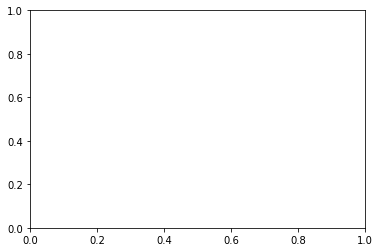

In [322]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
f_importances(clf.coef_, features_names)

clf.coef_

In [320]:
X_features


array([[ 0.06571969, -0.01460082, -0.        , ..., -0.56452967,
        -0.04238874, -0.09297537],
       [ 0.27111826,  0.28074818, -0.        , ..., -0.56560332,
        -0.05956491, -0.08321091],
       [-0.75587459, -0.53603055, -0.        , ..., -0.56560547,
        -0.0354685 , -0.09102005],
       ...,
       [ 2.32510396,  1.51717451, -0.        , ..., -0.56560547,
        -0.0354685 , -0.08971766],
       [-0.24237816,  0.02659387, -0.        , ..., -0.56560547,
        -0.04350131, -0.07670417],
       [ 0.27111826, -0.94162786, -0.        , ..., -0.56560547,
        -0.08362119, -0.08971766]])